### Contents
    1. Importing libraries and data
    2. Data wrangling
    3. Data cleaning
       a. Finding and addressing missing values
       b. Finding and addressing mixed data types
       c. Finding and addressing duplicate values
    4. Additional cleaning
    5. Exporting data

# 01. Importing libraries and datasets

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#importing datasets
path=r'C:\Users\munav\Desktop\bootcamps\Projects\RealEstate'
df1=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_Chicago.csv'))
df2=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_Chicago2.csv'))
df3=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_Chicago3.csv'))
df4=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_Dallas.csv'))
df5=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_Houston.csv'))

In [3]:
#importing datasets
df6=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_LA.csv'))
df7=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_NY.csv'))
df8=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_Philadelphia.csv'))
df9=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_Phoenix.csv'))
df10=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_SA.csv'))
df11=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_SD.csv'))
df12=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_SJ.csv'))

# 02. Data wrangling

In [4]:
#Merging the datasets
df_concat=pd.concat([df1,df2,df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=0)

In [5]:
df_concat.shape

(60890, 8)

In [6]:
df_concat.head()

,city,address1,address2,price,beds,baths,sqft,sqftlot
0,Chicago,2711 W Congress Pkwy Apt 2,"Chicago,, IL, ,60612","$270,000",3.0,2,"1,400",NaN
1,Chicago,7032 S Laflin St,"Chicago,, IL, ,60636","$110,000",5.0,3,NaN,"6,200"
2,Chicago,4111 W Washington Blvd,"Chicago,, IL, ,60624","$20,000",3.0,2,NaN,"3,125"
3,Chicago,1560 E 93rd St,"Chicago,, IL, ,60619","$69,900",2.0,2,"1,124","4,626"
4,Chicago,209 N LA Crosse Ave,"Chicago,, IL, ,60644","$119,000",4.0,2,NaN,"2,178"


In [7]:
df_concat.tail()

,city,address1,address2,price,beds,baths,sqft,sqftlot
781,San Jose,498 Irving Ave,"San Jose,, CA, ,95128","$699,999",2.0,1,988,"4,138"
782,San Jose,3487 Ramstad Dr,"San Jose,, CA, ,95127","$1,250,000",NaN,NaN,NaN,1.5
783,San Jose,Miradero Ave,"San Jose,, CA, ,95127","$400,000",NaN,NaN,NaN,1.64
784,San Jose,14830 Corralitos Ln,"San Jose,, CA, ,95127","$1,050,000",NaN,NaN,NaN,0.85
785,San Jose,546 Bird Ave,"San Jose,, CA, ,95125","$1,150,000",NaN,NaN,NaN,"9,439"


In [8]:
#Renaming the dataset
df=df_concat

In [9]:
#Extracting zip code
df['zip']=df['address2'].str.split(', ,').str[1]
df['zip'].value_counts(dropna=False)

78253    1121
78245     840
78254     835
60611     578
78252     536
         ... 
78056       1
91748       1
78006       1
90220       1
90717       1
Name: zip, Length: 789, dtype: int64

In [10]:
#Extracting state
df['state']=df['address2'].str.split(',').str[2]
df['state'].value_counts(dropna=False)

 TX    20326
 CA     9807
 IL     8596
 NY     8591
 PA     7987
 AZ     5520
NaN       62
           1
Name: state, dtype: int64

In [11]:
df.head()

,city,address1,address2,price,beds,baths,sqft,sqftlot,zip,state
0,Chicago,2711 W Congress Pkwy Apt 2,"Chicago,, IL, ,60612","$270,000",3.0,2,"1,400",NaN,60612,IL
1,Chicago,7032 S Laflin St,"Chicago,, IL, ,60636","$110,000",5.0,3,NaN,"6,200",60636,IL
2,Chicago,4111 W Washington Blvd,"Chicago,, IL, ,60624","$20,000",3.0,2,NaN,"3,125",60624,IL
3,Chicago,1560 E 93rd St,"Chicago,, IL, ,60619","$69,900",2.0,2,"1,124","4,626",60619,IL
4,Chicago,209 N LA Crosse Ave,"Chicago,, IL, ,60644","$119,000",4.0,2,NaN,"2,178",60644,IL


In [12]:
#Renaming address1 
df.rename(columns={'address1' : 'address'}, inplace=True)

In [13]:
#Renaming the state abbreviations with full name
df['state']=df['state'].str.strip()
df['state']=df['state'].replace({ 'AZ': 'Arizona', 'CA':'California', 'IL':'Illinois',  'PA':'Pennsylvania', 'TX':'Texas', 'NY':'New York'})
df['state'].value_counts(dropna=False)

Texas           20326
California       9807
Illinois         8596
New York         8591
Pennsylvania     7987
Arizona          5520
NaN                62
                    1
Name: state, dtype: int64

In [14]:
df.dtypes

city        object
address     object
address2    object
price       object
beds        object
baths       object
sqft        object
sqftlot     object
zip         object
state       object
dtype: object

In [15]:
df['price'].value_counts(dropna=False)

$350,000       391
$275,000       345
$599,000       332
$250,000       331
$375,000       317
              ... 
$2,039,900       1
$1,069,589       1
$186,900         1
$399,088         1
$3,890,000       1
Name: price, Length: 7142, dtype: int64

In [16]:
df['baths'].value_counts(dropna=False)

2        15283
1         9280
2.5       8204
3         5440
NaN       5135
         ...  
72           1
22           1
32           1
28           1
baths        1
Name: baths, Length: 105, dtype: int64

In [17]:
df['sqft'].value_counts(dropna=False)

NaN      9651
1,200     482
1,000     304
1,600     281
1,800     272
         ... 
4,769       1
9,198       1
9,900       1
4,743       1
3,389       1
Name: sqft, Length: 5082, dtype: int64

In [18]:
df['sqftlot'].value_counts(dropna=False)

NaN      16078
3,125      594
2,500      475
0.24       471
0.23       369
         ...  
8,256        1
4,236        1
5,404        1
7,757        1
29.79        1
Name: sqftlot, Length: 7008, dtype: int64

In [19]:
#Marking nonnumerical values as missing
df.loc[df['price']=='Contact For Price','price']=np.nan

In [20]:
#Converting strings into floats
df['price']=df['price'].str.replace('$', '')
df['price']=df['price'].str.replace(',', '')
df['price']=df['price'].str.strip()
df['price']=pd.to_numeric(df['price'], errors='coerce')
df['beds']=pd.to_numeric(df['beds'], errors='coerce')
df['baths']=pd.to_numeric(df['baths'], errors='coerce')
df['sqft']=df['sqft'].str.replace(',', '')
df['sqft']=pd.to_numeric(df['sqft'], errors='coerce')
df['sqftlot']=df['sqftlot'].str.replace(',', '')
df['sqftlot']=pd.to_numeric(df['sqftlot'], errors='coerce')
df.dtypes

C:\Users\munav\AppData\Local\Temp\ipykernel_32892\1135201678.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price']=df['price'].str.replace('$', '')


city         object
address      object
address2     object
price       float64
beds        float64
baths       float64
sqft        float64
sqftlot     float64
zip          object
state        object
dtype: object

In [21]:
df['sqft'].value_counts(dropna=False)

NaN       9652
1200.0     482
1000.0     304
1600.0     281
1800.0     272
          ... 
5198.0       1
601.0        1
5231.0       1
3643.0       1
3389.0       1
Name: sqft, Length: 5081, dtype: int64

In [22]:
df['price'].value_counts(dropna=False)

350000.0     391
275000.0     345
599000.0     332
250000.0     331
375000.0     317
            ... 
3075000.0      1
2039900.0      1
1069589.0      1
186900.0       1
3890000.0      1
Name: price, Length: 7141, dtype: int64

In [23]:
#Converting lots in acre into sqft- Multiplying lots which are smaller than building by 43560
df.loc[df['sqftlot']<df['sqft'], 'sqftlot']*=43560

In [24]:
#Creating price per sqft and price per sqftlot columns
df['price_per_sqft']=df['price']/df['sqft']
df['price_per_sqft_lot']=df['price']/df['sqftlot']

# 03. Data cleaning

### a. Finding and addressing missing values

In [25]:
#Finding missing values
df.isnull().sum()

city                      0
address                 145
address2                  2
price                    87
beds                   5428
baths                  6261
sqft                   9652
sqftlot               16079
zip                      71
state                    62
price_per_sqft         9727
price_per_sqft_lot    16111
dtype: int64

In [26]:
#Missing values in price column
df_missing=df[df['price'].isnull()]
df_missing.head()

,city,address,address2,price,beds,baths,sqft,sqftlot,zip,state,price_per_sqft,price_per_sqft_lot
113,Chicago,10419 S Avenue N,"Chicago,, IL, ,60617",NaN,3.0,1.0,1144.0,4661.0,60617,Illinois,NaN,NaN
211,Chicago,24 E 99th Pl,"Chicago,, IL, ,60628",NaN,3.0,2.0,764.0,NaN,60628,Illinois,NaN,NaN
486,Chicago,7425 S Harvard Ave,"Chicago,, IL, ,60621",NaN,4.0,4.0,NaN,3920.0,60621,Illinois,NaN,NaN
505,Chicago,743 E 84th Pl Apt 3W,"Chicago,, IL, ,60619",NaN,2.0,1.0,832.0,NaN,60619,Illinois,NaN,NaN
506,Chicago,10838 S Homan Ave,"Chicago,, IL, ,60655",NaN,3.0,1.0,644.0,6142.0,60655,Illinois,NaN,NaN


In [27]:
df_missing['state'].value_counts(dropna=False)

Illinois      40
Texas         38
Arizona        7
NaN            1
California     1
Name: state, dtype: int64

In [28]:
df_missing['city'].value_counts(dropna=False)

Chicago        40
San Antonio    31
Houston         7
Phoenix         7
San Diego       2
Name: city, dtype: int64

In [29]:
df_missing['zip'].value_counts(dropna=False)

78109    18
77048     7
60628     7
78260     5
78222     5
85054     5
          3
60617     3
78253     3
60643     2
60623     2
60620     2
60609     2
60655     2
60619     2
60618     2
60621     2
60611     2
60602     1
60636     1
60625     1
60608     1
60654     1
60651     1
60637     1
60649     1
60653     1
60641     1
60612     1
60644     1
NaN       1
Name: zip, dtype: int64

#### Missing values in price seems to be random and makes up only 0.1% of the data. Seeing that our analysis is aimed at comparing house prices, we can remove the missing rows.

In [30]:
#Removing missing 87 prices
df.dropna(subset=['price'], inplace=True)
df.shape

(60803, 12)

In [31]:
#Missing values in State
df_missing=df[df['state'].isnull()]
df_missing['city'].value_counts(dropna=False)

Chicago        20
New York       19
Los Angeles    15
Dallas          7
Name: city, dtype: int64

In [32]:
#Filling in states for the 10 cities under observation
df.loc[df['city']=='Chicago', 'state']='Illinois'
df.loc[df['city']=='Los Angeles', 'state']='California'
df.loc[df['city']=='New York', 'state']='New York'
df.loc[df['city']=='Dallas', 'state']='Texas'
df.loc[df['city']=='Brooklyn', 'state']='New York'
df.loc[df['city']=='Flushing', 'state']='New York'
df.loc[df['city']=='Bronx', 'state']='New York'
df_missing=df[df['state'].isnull()]
df_missing['city'].value_counts(dropna=False)

Series([], Name: city, dtype: int64)

In [33]:
df_missing['zip'].value_counts(dropna=False)

Series([], Name: zip, dtype: int64)

In [34]:
df_missing['sqft'].value_counts(dropna=False)

Series([], Name: sqft, dtype: int64)

In [35]:
#Missing values in sqft
df_missing=df[df['sqft'].isnull()]
df_missing['sqftlot'].value_counts(dropna=False)

NaN       2817
3125.0     342
3049.0     149
2500.0     136
2000.0     116
          ... 
7538.0       1
6867.0       1
5452.0       1
100.0        1
9439.0       1
Name: sqftlot, Length: 2186, dtype: int64

In [36]:
df_missing.shape

(9640, 12)

In [37]:
df_missing['state'].value_counts(dropna=False)

New York        2935
Illinois        2655
Pennsylvania    1597
Texas           1276
California       878
Arizona          299
Name: state, dtype: int64

#### We will keep the rows with missing sqft values, since we will also need to compare the overall prices.

### b. Finding and addressing mixed data types

In [38]:
#Finding mixed data column
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

address
address2
zip


In [39]:
#Fixing mixed type data
df['address']=df['address'].astype('str')
df['address2']=df['address2'].astype('str')
df['zip']=df['zip'].astype('str')

In [40]:
df.dtypes

city                   object
address                object
address2               object
price                 float64
beds                  float64
baths                 float64
sqft                  float64
sqftlot               float64
zip                    object
state                  object
price_per_sqft        float64
price_per_sqft_lot    float64
dtype: object

### c. Finding and addressing duplicate values

In [41]:
#Finding duplicates
df_dups = df[df.duplicated(['address', 'address2', 'price', 'beds', 'baths','sqft', 'sqftlot'])]
df_dups.shape

(9881, 12)

In [42]:
df_dups.tail()

,city,address,address2,price,beds,baths,sqft,sqftlot,zip,state,price_per_sqft,price_per_sqft_lot
761,San Jose,839 N 14th St,"San Jose,, CA, ,95112",599000.0,NaN,NaN,NaN,5227.00,95112,California,NaN,114.597283
768,San Jose,10868 Dougherty Ave,"Morgan Hill,, CA, ,95037",1649000.0,NaN,NaN,NaN,10.01,95037,California,NaN,164735.264735
770,San Jose,5150 Felter Rd,"San Jose,, CA, ,95132",2098000.0,4.0,2.5,2169.0,167270.40,95132,California,967.266021,12.542566
771,San Jose,11401 Clayton Rd,"San Jose,, CA, ,95127",580000.0,NaN,NaN,NaN,1.35,95127,California,NaN,429629.629630
783,San Jose,Miradero Ave,"San Jose,, CA, ,95127",400000.0,NaN,NaN,NaN,1.64,95127,California,NaN,243902.439024


In [43]:
df.loc[df['address']=='10868 Dougherty Ave']

,city,address,address2,price,beds,baths,sqft,sqftlot,zip,state,price_per_sqft,price_per_sqft_lot
625,San Jose,10868 Dougherty Ave,"Morgan Hill,, CA, ,95037",1649000.0,NaN,NaN,NaN,10.01,95037,California,NaN,164735.264735
768,San Jose,10868 Dougherty Ave,"Morgan Hill,, CA, ,95037",1649000.0,NaN,NaN,NaN,10.01,95037,California,NaN,164735.264735


In [44]:
df_dups.head()

,city,address,address2,price,beds,baths,sqft,sqftlot,zip,state,price_per_sqft,price_per_sqft_lot
188,Chicago,3001 S Michigan Ave Unit 1606,"Chicago,, IL, ,60616",79000.0,NaN,1.0,575.0,NaN,60616,Illinois,137.391304,NaN
296,Chicago,4559 S King Dr Unit A6,"Chicago,, IL, ,60653",304800.0,3.0,NaN,3000.0,NaN,60653,Illinois,101.600000,NaN
356,Chicago,10821 S Christiana Ave,"Chicago,, IL, ,60655",324900.0,4.0,2.0,1960.0,74008440.0,60655,Illinois,165.765306,0.004390
431,Chicago,8133 S Christiana Ave,"Chicago,, IL, ,60652",185000.0,4.0,3.0,1128.0,4373.0,60652,Illinois,164.007092,42.305054
529,Chicago,8219 S Chappel Ave,"Chicago,, IL, ,60617",250000.0,4.0,2.0,NaN,NaN,60617,Illinois,NaN,NaN


In [45]:
df.loc[df['address']=='4559 S King Dr Unit A6']

,city,address,address2,price,beds,baths,sqft,sqftlot,zip,state,price_per_sqft,price_per_sqft_lot
177,Chicago,4559 S King Dr Unit A6,"Chicago,, IL, ,60653",304800.0,3.0,NaN,3000.0,NaN,60653,Illinois,101.6,NaN
296,Chicago,4559 S King Dr Unit A6,"Chicago,, IL, ,60653",304800.0,3.0,NaN,3000.0,NaN,60653,Illinois,101.6,NaN


In [46]:
#Removing duplicated values
df=df.drop_duplicates(subset=(['address', 'address2', 'price', 'beds', 'baths','sqft', 'sqftlot']), keep='last')
df.shape

(50922, 12)

# 04. Additional cleaning and merging

### a. Checking for outliers

In [47]:
#Dropping address2 column
df=df.drop(columns=['address2'])
df.shape

(50922, 11)

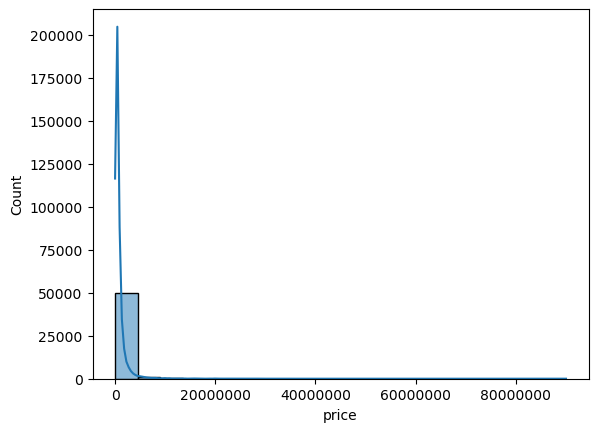

In [48]:
#Checking for outliers in price column
sns.histplot(df['price'], bins = 20, kde = True)
plt.ticklabel_format(style='plain', axis='x')

In [49]:
#Since we are interested in houses which are in inhabitable condition and ready to move in, we will remove rows containing sqftlot information without information about sqft, beds and baths.
df.loc[(df['sqft'].isnull())&(df['beds'].isnull())&(df['baths'].isnull())&(df['sqftlot'].notnull()), 'price']=np.nan
df.dropna(subset=['price'], inplace=True)
df.shape


(47524, 11)

In [50]:
df.loc[df['price']<30000]

,city,address,price,beds,baths,sqft,sqftlot,zip,state,price_per_sqft,price_per_sqft_lot
2,Chicago,4111 W Washington Blvd,20000.0,3.0,2.0,NaN,3125.0,60624,Illinois,NaN,6.400000
101,Chicago,10205 S Perry Ave,29900.0,2.0,1.0,1000.0,3075.0,60628,Illinois,29.900000,9.723577
467,Chicago,5330 S Lowe Ave,18000.0,3.0,1.0,996.0,3125.0,60609,Illinois,18.072289,5.760000
786,Chicago,214 W 106th Pl,25000.0,4.0,1.0,NaN,3123.0,60628,Illinois,NaN,8.005123
1177,Chicago,908 W 71st St,28900.0,3.0,1.0,1023.0,3125.0,60621,Illinois,28.250244,9.248000
1246,Chicago,8039 S Union Ave,24900.0,2.0,1.0,930.0,NaN,60620,Illinois,26.774194,NaN
1648,Chicago,10241 S Wentworth Ave,29100.0,3.0,1.0,1303.0,NaN,60628,Illinois,22.333078,NaN
1932,Chicago,12049 S LA Salle St,29000.0,4.0,4.0,NaN,3750.0,60628,Illinois,NaN,7.733333
1977,Chicago,7835 S Sangamon St,15000.0,2.0,1.0,1030.0,NaN,60620,Illinois,14.563107,NaN
2751,Chicago,1430 W 115th St,19900.0,4.0,2.0,912.0,6199.0,60643,Illinois,21.820175,3.210195


In [51]:
#It seems like houses below 30,000 USD are not in a condition to live, so we will drop them.
df=df[df['price']>30000]
df.shape

(47483, 11)

In [52]:
df_missing2=df_missing[df_missing['sqftlot'].notnull()]

In [53]:
df_missing2.shape

(6823, 12)

In [54]:
df_missing2.head()

,city,address,address2,price,beds,baths,sqft,sqftlot,zip,state,price_per_sqft,price_per_sqft_lot
1,Chicago,7032 S Laflin St,"Chicago,, IL, ,60636",110000.0,5.0,3.0,NaN,6200.0,60636,Illinois,NaN,17.741935
2,Chicago,4111 W Washington Blvd,"Chicago,, IL, ,60624",20000.0,3.0,2.0,NaN,3125.0,60624,Illinois,NaN,6.400000
4,Chicago,209 N LA Crosse Ave,"Chicago,, IL, ,60644",119000.0,4.0,2.0,NaN,2178.0,60644,Illinois,NaN,54.637282
6,Chicago,7250 S Lowe Ave,"Chicago,, IL, ,60621",285000.0,12.0,6.5,NaN,6098.0,60621,Illinois,NaN,46.736635
14,Chicago,5750 S Elizabeth St,"Chicago,, IL, ,60636",50000.0,5.0,2.0,NaN,3049.0,60636,Illinois,NaN,16.398819


In [55]:
df_missing['sqftlot'].value_counts(dropna=False)

NaN       2817
3125.0     342
3049.0     149
2500.0     136
2000.0     116
          ... 
7538.0       1
6867.0       1
5452.0       1
100.0        1
9439.0       1
Name: sqftlot, Length: 2186, dtype: int64

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

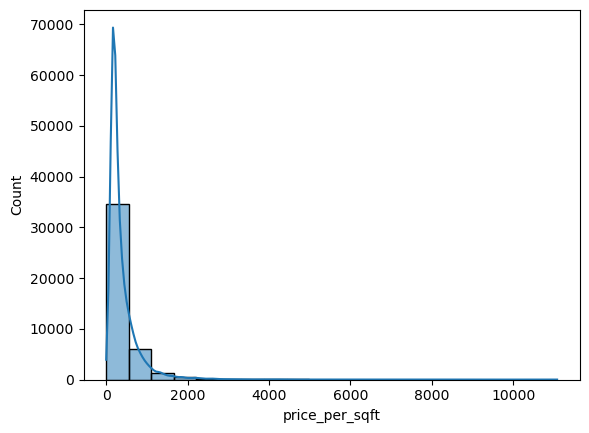

In [56]:
#Checking for outliers in price_per_sqft column via histogram
sns.histplot(df['price_per_sqft'], bins = 20, kde = True)

In [57]:
df.loc[df['price_per_sqft']>6000]

,city,address,price,beds,baths,sqft,sqftlot,zip,state,price_per_sqft,price_per_sqft_lot
31,New York,432 Park Ave Apt 81A,19500000.0,3.0,3.0,2633.0,NaN,10022,New York,7406.000760,NaN
516,New York,220 Central Park S Apt 39A,34500000.0,3.0,3.5,3114.0,NaN,10019,New York,11078.998073,NaN
679,New York,303 Park Ave S Unit 4105,18500000.0,4.0,4.5,2971.0,NaN,10010,New York,6226.859643,NaN
766,New York,50 Central Park S # 30,90000000.0,3.0,NaN,10875.0,NaN,10019,New York,8275.862069,NaN
1315,New York,432 Park Ave Apt 66A,26500000.0,3.0,3.5,4019.0,NaN,10022,New York,6593.680020,NaN
5067,New York,111 W 57th St # 70,30500000.0,3.0,3.5,3873.0,NaN,10019,New York,7875.032275,NaN
5147,New York,432 Park Ave Apt 66B,29500000.0,4.0,4.5,4019.0,NaN,10022,New York,7340.134362,NaN
5392,New York,20 W 53rd B/C St Unit 18,31999000.0,5.0,7.0,4299.0,NaN,10019,New York,7443.358921,NaN
5490,New York,50 Central Park S Units 30 & 31,90000000.0,3.0,5.0,10875.0,NaN,10019,New York,8275.862069,NaN
6068,New York,1171 86th St Unit 1,5800000.0,2.0,2.0,900.0,NaN,11228,New York,6444.444444,NaN


#### The highest prices per sqft have been checked and verified that they are correct. Thus, we will leave them for now, for further analysis.

<AxesSubplot:xlabel='price_per_sqft_lot', ylabel='Count'>

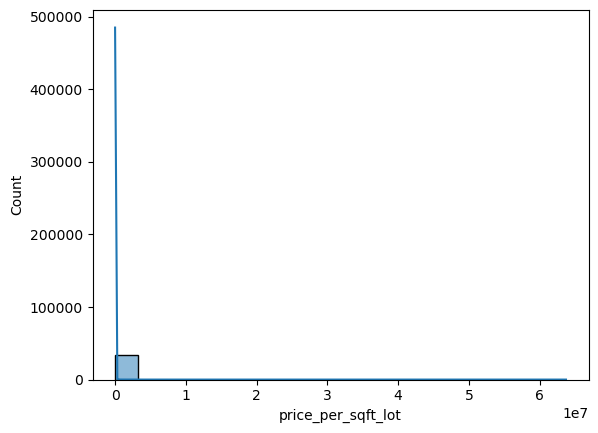

In [58]:
#Checking for outliers inprice per sqflot column via histogram
sns.histplot(df['price_per_sqft_lot'], bins = 20, kde = True)

<AxesSubplot:xlabel='beds', ylabel='Count'>

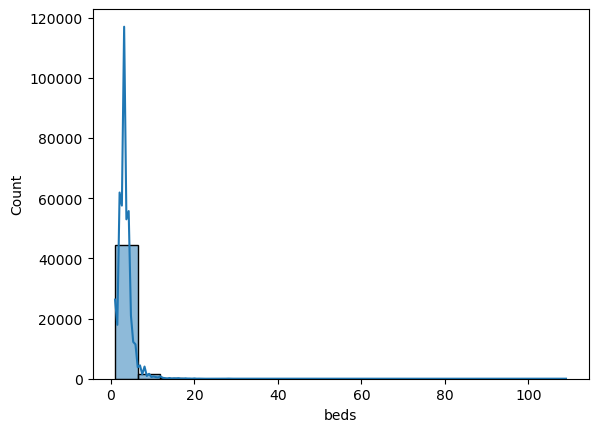

In [59]:
#Checking for outliers in baths column via histogram
sns.histplot(df['beds'], bins = 20, kde = True)

In [60]:
#Since we are not interested in apartment complexes or units we will remove the houses with more than 10 beds
df=df[df['beds']<=10]
df.shape

(45912, 11)

### b. Merging annual income after tax data

In [61]:
#Importig data
df_salary=pd.read_excel(os.path.join(path, '02 Data', 'Original Data', 'Salaries.xlsx'))
df_tax=pd.read_excel(os.path.join(path, '02 Data', 'Original Data', 'State_Property_Tax_Rate.xlsx'))

In [62]:
df_salary.shape

(63, 6)

In [63]:
df_salary.head()

,Unnamed: 0,city,state,country,Avg monthly income,avg annual income
0,1,San Jose,CA,United States,6496.00,77952.00
1,2,Seattle,WA,United States,6057.80,72693.60
2,3,Irvine,CA,United States,6030.42,72365.04
3,4,San Francisco,CA,United States,5931.34,71176.08
4,5,New York,NY,United States,5930.92,71171.04


In [64]:
df_salary.dtypes

Unnamed: 0              int64
city                   object
state                  object
country                object
Avg monthly income    float64
avg annual income     float64
dtype: object

In [65]:
df_tax.head()

,Unnamed: 0,state,property tax rate
0,1,Hawaii,0.28
1,2,Alabama,0.41
2,3,Colorado,0.51
3,4,Louisiana,0.55
4,5,South Carolina,0.57


In [66]:
df_tax.dtypes

Unnamed: 0             int64
state                 object
property tax rate    float64
dtype: object

In [67]:
#Merging the datasets
df_merged=df.merge(df_salary, on=['city'], how='left', indicator=True)
df_merged['_merge'].value_counts(dropna=False)

both          45912
left_only         0
right_only        0
Name: _merge, dtype: int64

In [68]:
df_merged.head()

,city,address,price,beds,baths,sqft,sqftlot,zip,state_x,price_per_sqft,price_per_sqft_lot,Unnamed: 0,state_y,country,Avg monthly income,avg annual income,_merge
0,Chicago,2711 W Congress Pkwy Apt 2,270000.0,3.0,2.0,1400.0,NaN,60612,Illinois,192.857143,NaN,22,IL,United States,4976.19,59714.28,both
1,Chicago,7032 S Laflin St,110000.0,5.0,3.0,NaN,6200.0,60636,Illinois,NaN,17.741935,22,IL,United States,4976.19,59714.28,both
2,Chicago,1560 E 93rd St,69900.0,2.0,2.0,1124.0,4626.0,60619,Illinois,62.188612,15.110246,22,IL,United States,4976.19,59714.28,both
3,Chicago,209 N LA Crosse Ave,119000.0,4.0,2.0,NaN,2178.0,60644,Illinois,NaN,54.637282,22,IL,United States,4976.19,59714.28,both
4,Chicago,1248 W 108th Pl,114900.0,3.0,1.5,1069.0,3123.0,60643,Illinois,107.483630,36.791547,22,IL,United States,4976.19,59714.28,both


In [69]:
df_merged['avg annual income'].value_counts(dropna=False)

71171.04    6968
59373.84    6780
55132.92    6752
59714.28    6634
58901.76    5247
63159.84    4849
61880.16    4279
63889.56    2137
67120.32    1635
77952.00     631
Name: avg annual income, dtype: int64

In [70]:
#Dropping unnecessary columns
df=df_merged.drop(columns=['state_y', 'Unnamed: 0', 'country', '_merge'])
df=df.rename(columns={'state_x':'state'})

In [71]:
df.head()

,city,address,price,beds,baths,sqft,sqftlot,zip,state,price_per_sqft,price_per_sqft_lot,Avg monthly income,avg annual income
0,Chicago,2711 W Congress Pkwy Apt 2,270000.0,3.0,2.0,1400.0,NaN,60612,Illinois,192.857143,NaN,4976.19,59714.28
1,Chicago,7032 S Laflin St,110000.0,5.0,3.0,NaN,6200.0,60636,Illinois,NaN,17.741935,4976.19,59714.28
2,Chicago,1560 E 93rd St,69900.0,2.0,2.0,1124.0,4626.0,60619,Illinois,62.188612,15.110246,4976.19,59714.28
3,Chicago,209 N LA Crosse Ave,119000.0,4.0,2.0,NaN,2178.0,60644,Illinois,NaN,54.637282,4976.19,59714.28
4,Chicago,1248 W 108th Pl,114900.0,3.0,1.5,1069.0,3123.0,60643,Illinois,107.483630,36.791547,4976.19,59714.28


In [72]:
#Changing data types
df['state']=df['state'].astype(str)
df_tax['state']=df_tax['state'].astype(str)

In [73]:
#Deleting any white space
df['state']=df['state'].str.strip()
df_tax['state']=df_tax['state'].str.strip()

In [74]:
#Merging datasets
df=df.merge(df_tax, on=['state'], how='left', indicator=True)
df['_merge'].value_counts(dropna=False)

both          45912
left_only         0
right_only        0
Name: _merge, dtype: int64

In [75]:
df=df.drop(columns=['_merge', 'Unnamed: 0'])
df.head()

,city,address,price,beds,baths,sqft,sqftlot,zip,state,price_per_sqft,price_per_sqft_lot,Avg monthly income,avg annual income,property tax rate
0,Chicago,2711 W Congress Pkwy Apt 2,270000.0,3.0,2.0,1400.0,NaN,60612,Illinois,192.857143,NaN,4976.19,59714.28,2.27
1,Chicago,7032 S Laflin St,110000.0,5.0,3.0,NaN,6200.0,60636,Illinois,NaN,17.741935,4976.19,59714.28,2.27
2,Chicago,1560 E 93rd St,69900.0,2.0,2.0,1124.0,4626.0,60619,Illinois,62.188612,15.110246,4976.19,59714.28,2.27
3,Chicago,209 N LA Crosse Ave,119000.0,4.0,2.0,NaN,2178.0,60644,Illinois,NaN,54.637282,4976.19,59714.28,2.27
4,Chicago,1248 W 108th Pl,114900.0,3.0,1.5,1069.0,3123.0,60643,Illinois,107.483630,36.791547,4976.19,59714.28,2.27


In [76]:
df['property tax rate'].value_counts(dropna=False)

1.80    15669
0.76     7115
1.72     6968
2.27     6634
1.58     5247
0.66     4279
Name: property tax rate, dtype: int64

# 05. Exporting data

In [77]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Real_estate_merged.pkl'))